# Tercer parcial

Sofia Macarena Castillo Badilla

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\marub\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [2]:
ensayo3_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col = 0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col = 0)

In [4]:
# con las funciones listas, solo las llamamos
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)

## filtrado de matrices

- para juntar las matrices (todos los sujetos) en 1
- porque un promedio sería muy restringido

In [5]:
# Creamos una matriz de conectividad a partir de la lista de 109 sujetos
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.4, 0.7)

<Axes: >

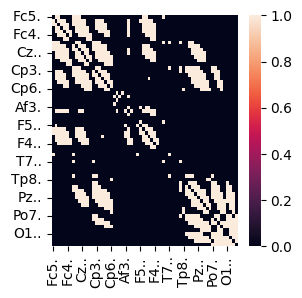

In [6]:
# Matriz binarizada --> data frame comprimido, con la info. de los 109 sujetos
plt.figure(figsize=(3,3))
sns.heatmap(resultado3_df)

## Generar estadísticos para decidir los umbrales

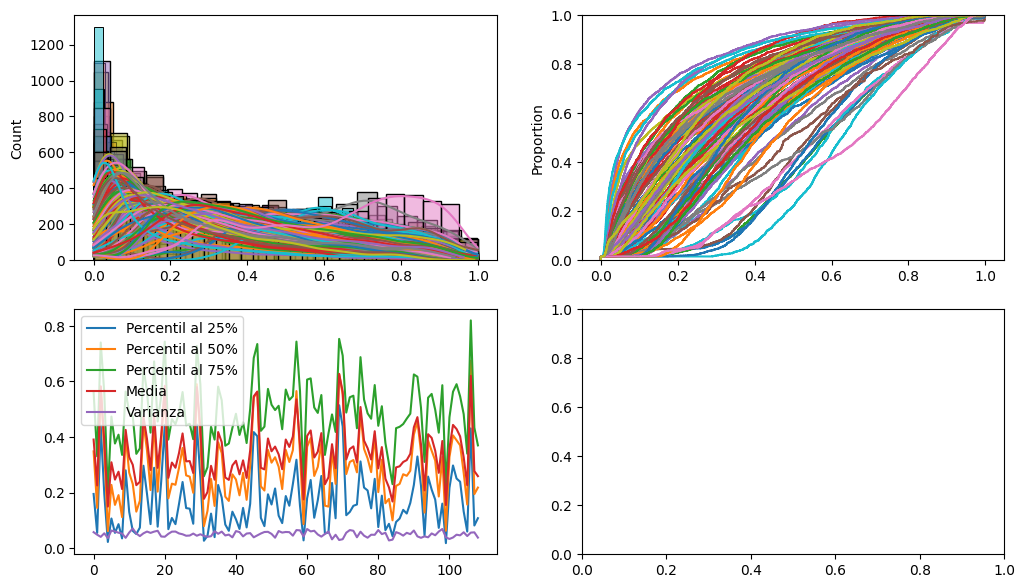

In [7]:
# Análisis para ensayo3
ensayos_dfs = ensayos3_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()


In [8]:
from scipy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [9]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_


In [10]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for idx, columna in enumerate(estadisticos_df.columns):
    d1, d2, d3, d4 = np.min(columnas[idx]), np.max(columnas[idx]), np.median(columnas[idx]), stats.median_abs_deviation(columnas[idx])
    estadisticos_df[columna] = [d1, d2, d3, d4]

In [11]:
estadisticos_df

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.676548
mediana,0.144574,0.273808,0.484181,0.327700,0.389466
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.060276


## Evaluación de los estadísticos

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 3')

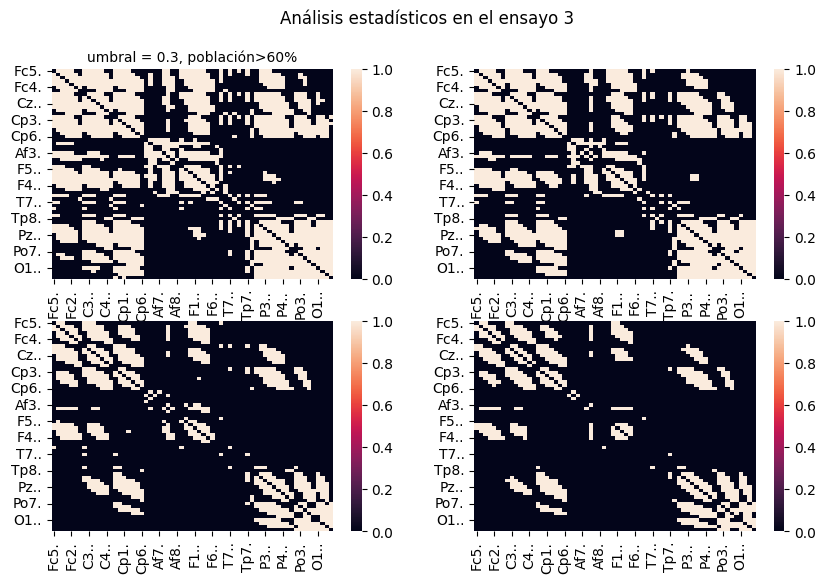

In [12]:
# comparativas entre valores de threshold, con subplots --> evaluar cuál es el mejor umbral

resultado3_df1 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.7)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.5, 0.7)


fig, axes = plt.subplots(2,2, figsize = (10, 6))

sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
axes[0,0].set_title("umbral = 0.3, población>60%", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 3')

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 4')

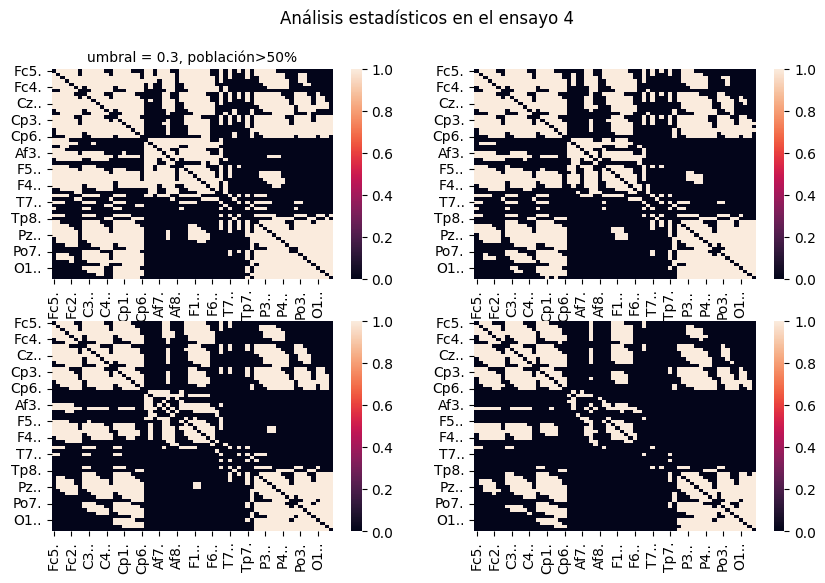

In [13]:
# ahora cambiamos los valores del porcentaje de la población

resultado4_df1 = capsula(ensayos4_dfs, 0.3, 0.5)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.3, 0.7) # *
resultado4_df4 = capsula(ensayos4_dfs, 0.3, 0.8)


fig, axes = plt.subplots(2,2, figsize = (10, 6))

sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
axes[0,0].set_title("umbral = 0.3, población>50%", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 4')

## Generación de resultados
- Después del análisis realizado, utilizando los mapas de calor para elegir un threshold adecuado y un porcentaje de la población que cumpla dicho umbral; se procederá a generar los resultados

Resultados a generar:
- Grafo 2d
- grafo 3d
- métricas de grafo
- gráfico de comunidades con hub

In [14]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df1)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df3)

In [15]:
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [16]:
# PLOT 3D

# construir dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop = True, inplace = True)

In [17]:
eeg_coords.loc["Fc5.", "y"]    

np.float64(0.2666)

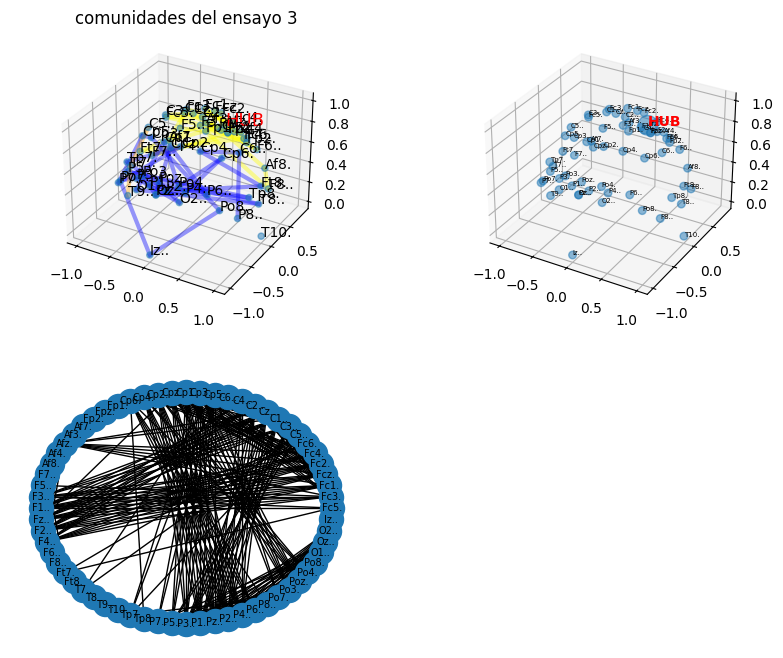

In [19]:
# Grafo de resultados para ensayo 3
hub = betwenness_3[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado3_df3, axes[2])

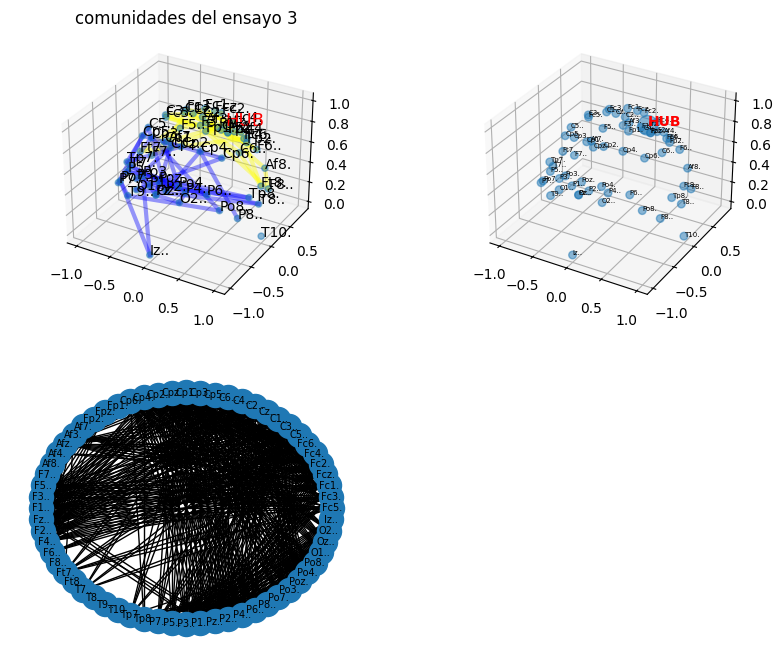

In [20]:
# Grafo de resultados para ensayo 4
hub = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado4_df3, axes[2])

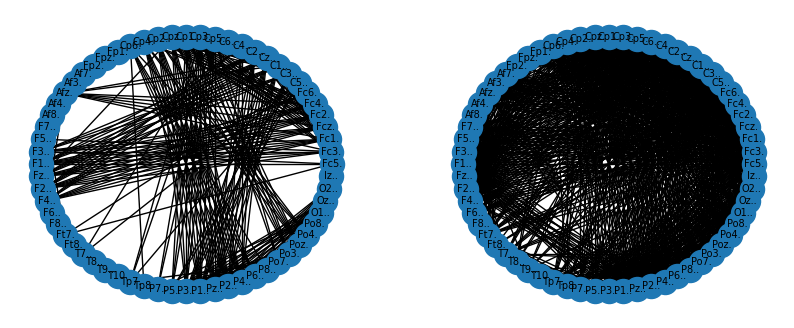

In [21]:
# Grafo2 para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado3_df3, axes[0])
ensayo_grafo = grafo2D(resultado4_df1, axes[1])

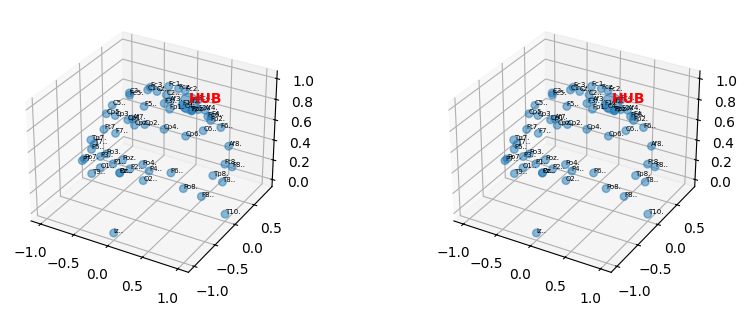

In [22]:
# Grafo3D para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub3, axes[0])
grafo3D(eeg_coords, hub4, axes[1])

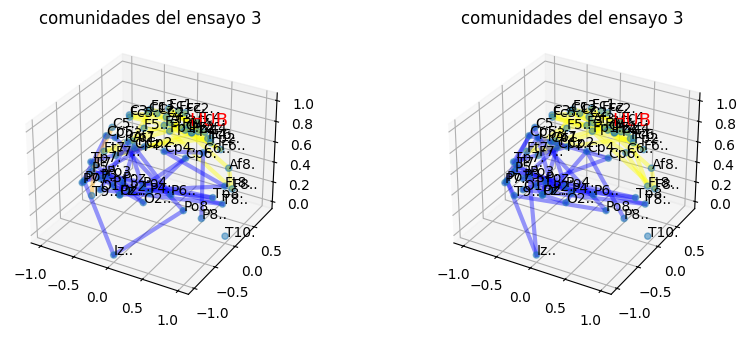

In [23]:
# Comunidades para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])

- podemos generar un grafo de comunidades, lo podemos encapsular en una línea y aplicarlo a más ensayos.
- Poder hacer comparaciones entre ensayos
- generar el for sobre las comunidades en vez de los nodos para hacer las comparaciones entre comunidades

# Sección examen tercer parcial, ensayos 5 y 6

In [24]:
# subir dataset
ensayo5_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_excel = r"C:\Users\marub\OneDrive\Escritorio\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"

ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col = 0)
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col = 0)

In [25]:
# lista de dataframes
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)

In [26]:
# compactar a una matriz
resultado5_df = capsula(ensayos5_dfs, 0.5, 0.6) # umbrales y población arbitrarios, después del análisis se establecerán correctamente
resultado6_df = capsula(ensayos6_dfs, 0.4, 0.7)

### Estadísticos

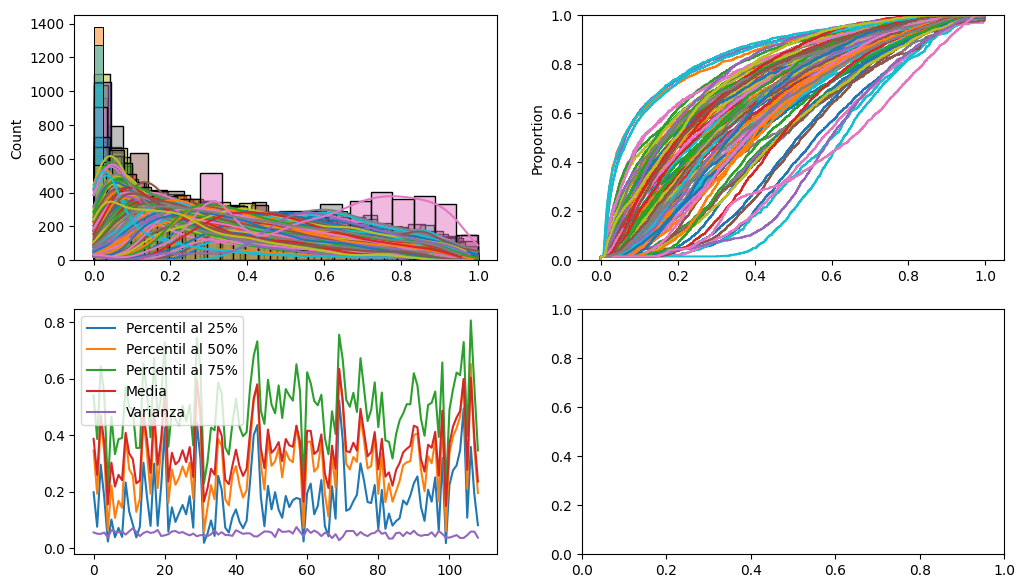

In [34]:
# Análisis para ensayo 5
ensayos_dfs = ensayos5_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

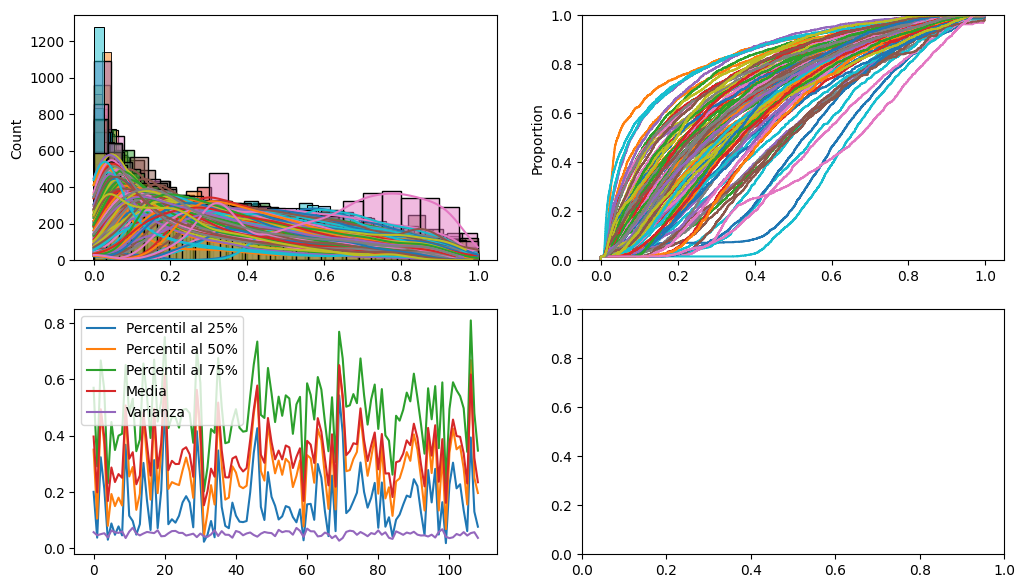

In [35]:
# Análisis para ensayo 6
ensayos_dfs = ensayos6_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for sujeto in ensayos_dfs:
    # cálculo estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

### Evaluación de los estadísticos

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 5')

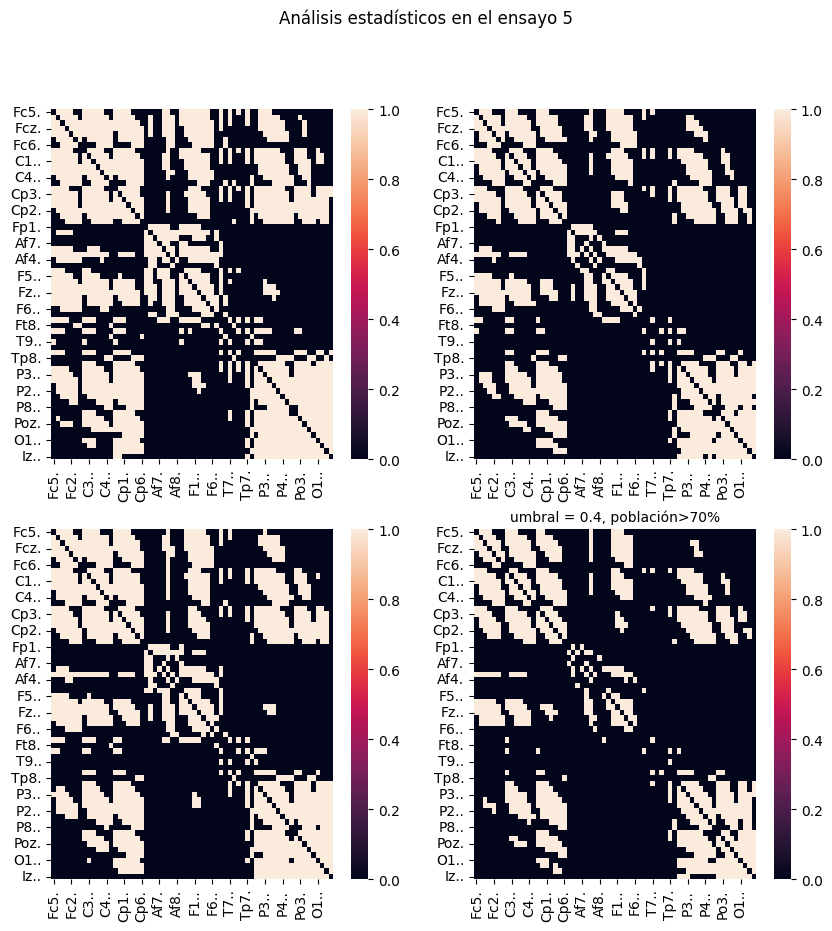

In [62]:
# comparativas entre valores de thresholds y población 

resultado5_df1 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_df2 = capsula(ensayos5_dfs, 0.4, 0.6)  
resultado5_df3 = capsula(ensayos5_dfs, 0.3, 0.7)  
resultado5_df4 = capsula(ensayos5_dfs, 0.4, 0.7)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])
axes[1,1].set_title("umbral = 0.4, población>70%", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 5')

Text(0.5, 0.98, 'Análisis estadísticos en el ensayo 6')

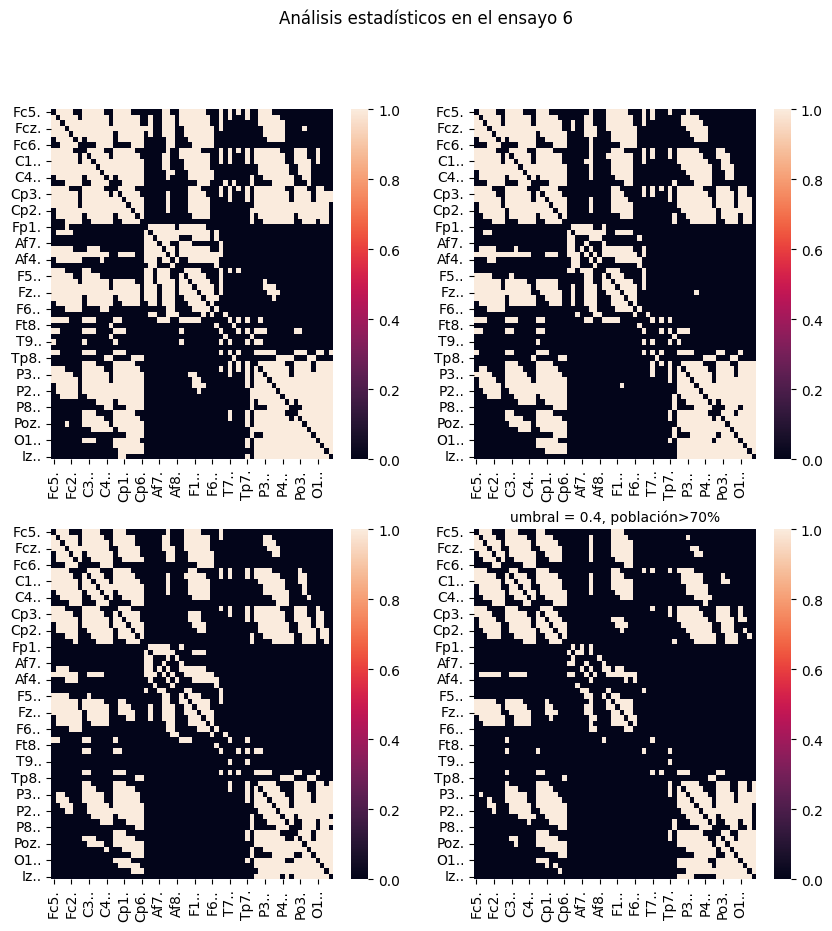

In [60]:
# comparativas entre valores de thresholds y población 

resultado6_df1 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df2 = capsula(ensayos6_dfs, 0.3, 0.7)  
resultado6_df3 = capsula(ensayos6_dfs, 0.4, 0.6)
resultado6_df4 = capsula(ensayos6_dfs, 0.4, 0.7)

fig, axes = plt.subplots(2,2, figsize = (10, 10))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])
axes[1,1].set_title("umbral = 0.4, población>70%", fontsize = 10)
fig.suptitle('Análisis estadísticos en el ensayo 6')

### Generación de resultados

In [64]:
# Convertir de dataframe a grafo
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df3)
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df1)

In [65]:
# Cálculo de métricas por ensayo
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)

(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)

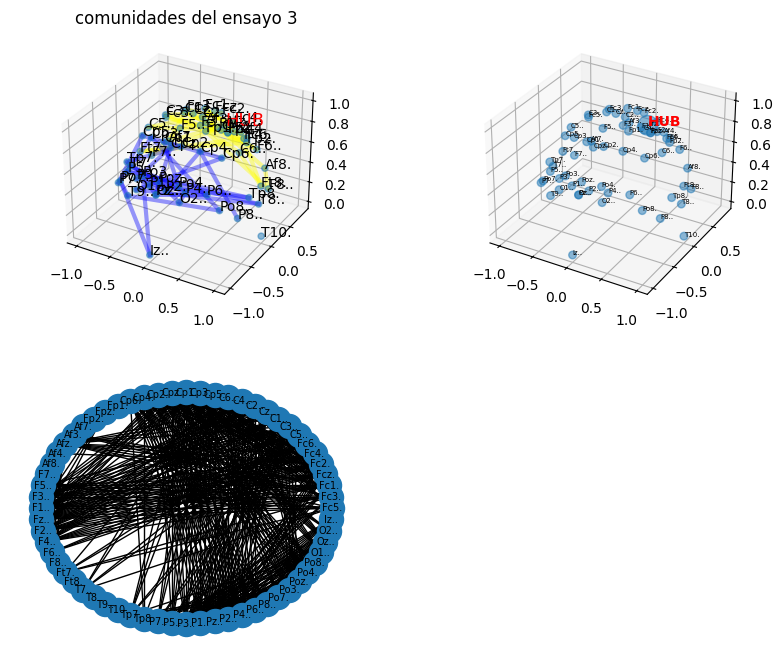

In [66]:
# Grafo de resultados para ensayo 5
hub = betwenness_5[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_5, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado5_df2, axes[2])

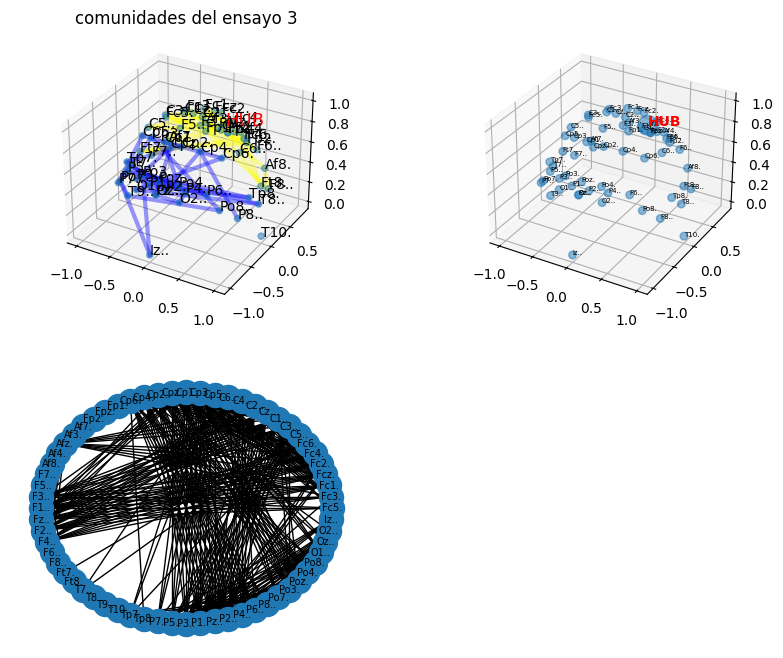

In [59]:
# Grafo de resultados para ensayo 6
hub = betwenness_6[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_6, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado6_df4, axes[2])

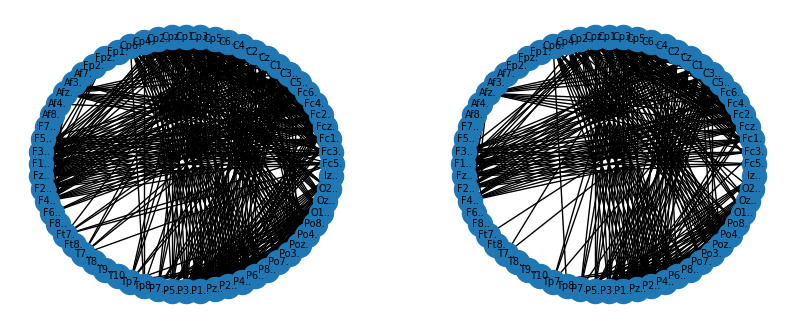

In [68]:
# Grafo 2d
hub5 = betwenness_5[0]
hub6 = betwenness_6[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado5_df2, axes[0])
ensayo_grafo = grafo2D(resultado6_df4, axes[1])

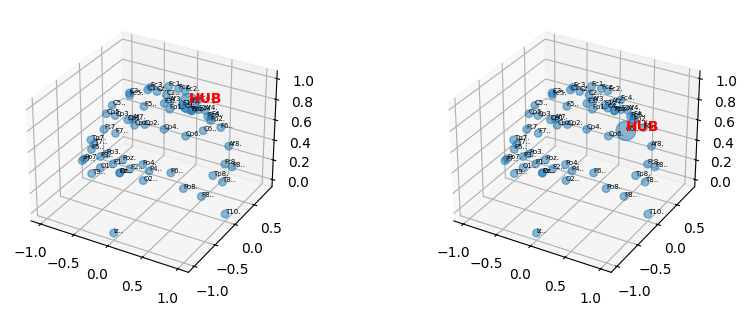

In [69]:
# Grafo 3d
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub5, axes[0])
grafo3D(eeg_coords, hub6, axes[1])


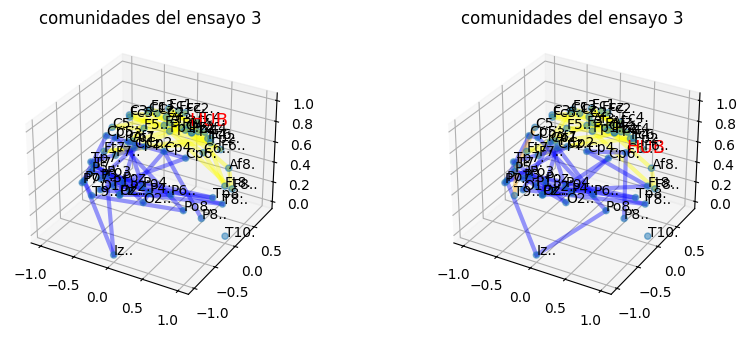

In [70]:
# Grafo de comunidades
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_5, hub5, eeg_coords, axes[0])
grafo_comunidades(communities_6, hub6, eeg_coords, axes[1])